
From FEM_DVR_build: building grid and KE with Gauss Lobatto quadrature of order  25
element  1  xmin =  0.0  xmax =  0.7894736842105263
element  2  xmin =  0.7894736842105263  xmax =  1.5789473684210527
element  3  xmin =  1.5789473684210527  xmax =  2.3684210526315788
element  4  xmin =  2.3684210526315788  xmax =  3.1578947368421053
element  5  xmin =  3.1578947368421053  xmax =  3.947368421052632
element  6  xmin =  3.947368421052632  xmax =  4.7368421052631575
element  7  xmin =  4.7368421052631575  xmax =  5.526315789473684
element  8  xmin =  5.526315789473684  xmax =  6.315789473684211
element  9  xmin =  6.315789473684211  xmax =  7.105263157894737
element  10  xmin =  7.105263157894737  xmax =  7.894736842105264
element  11  xmin =  7.894736842105264  xmax =  8.68421052631579
element  12  xmin =  8.68421052631579  xmax =  9.473684210526315
element  13  xmin =  9.473684210526315  xmax =  10.263157894736842
element  14  xmin =  10.263157894736842  xmax =  11.052631578947368
ele

<IPython.core.display.Javascript object>


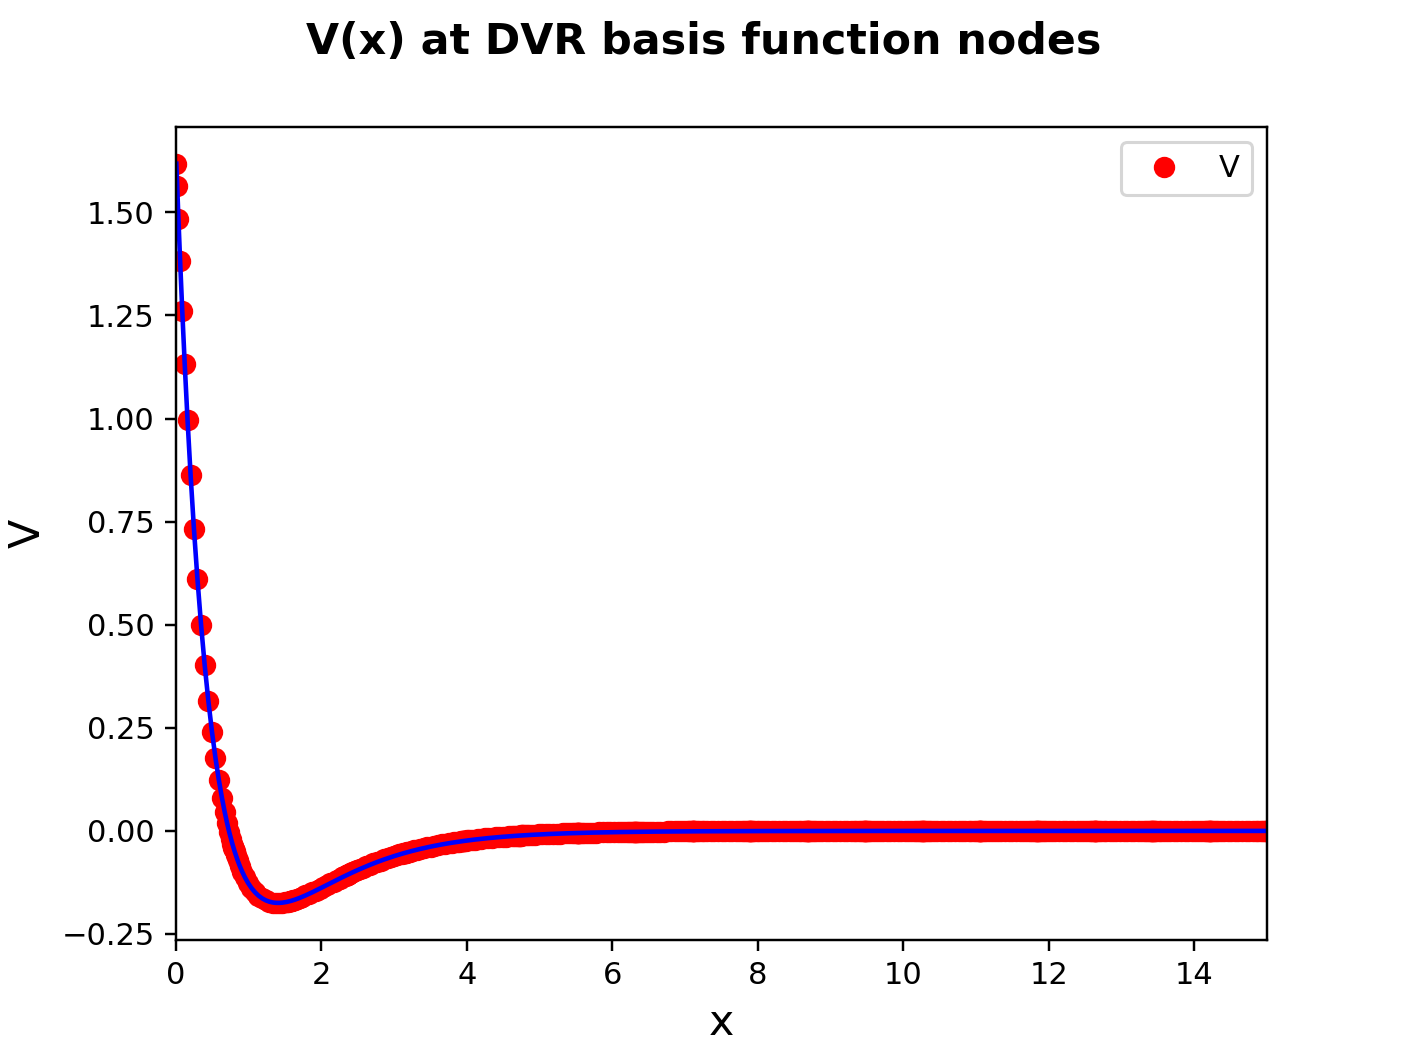


Constructed Hamiltonian at t = 0
DVR Eigenvalue, in atomic units
  0   -0.16758388119451326
  1   -0.15398326325361758
  2   -0.14095813820615202
  3   -0.12850850605212114
  4   -0.11663436679152644
  5   -0.10533572042437257
  6   -0.09461256695063798
  7   -0.08446490637034833
  8   -0.07489273868349335
  9   -0.06589606389006678
Norm of wave function  8    being plotted is  1.0000000000000002

Plot of  8 -th eigenfunction


<IPython.core.display.Javascript object>


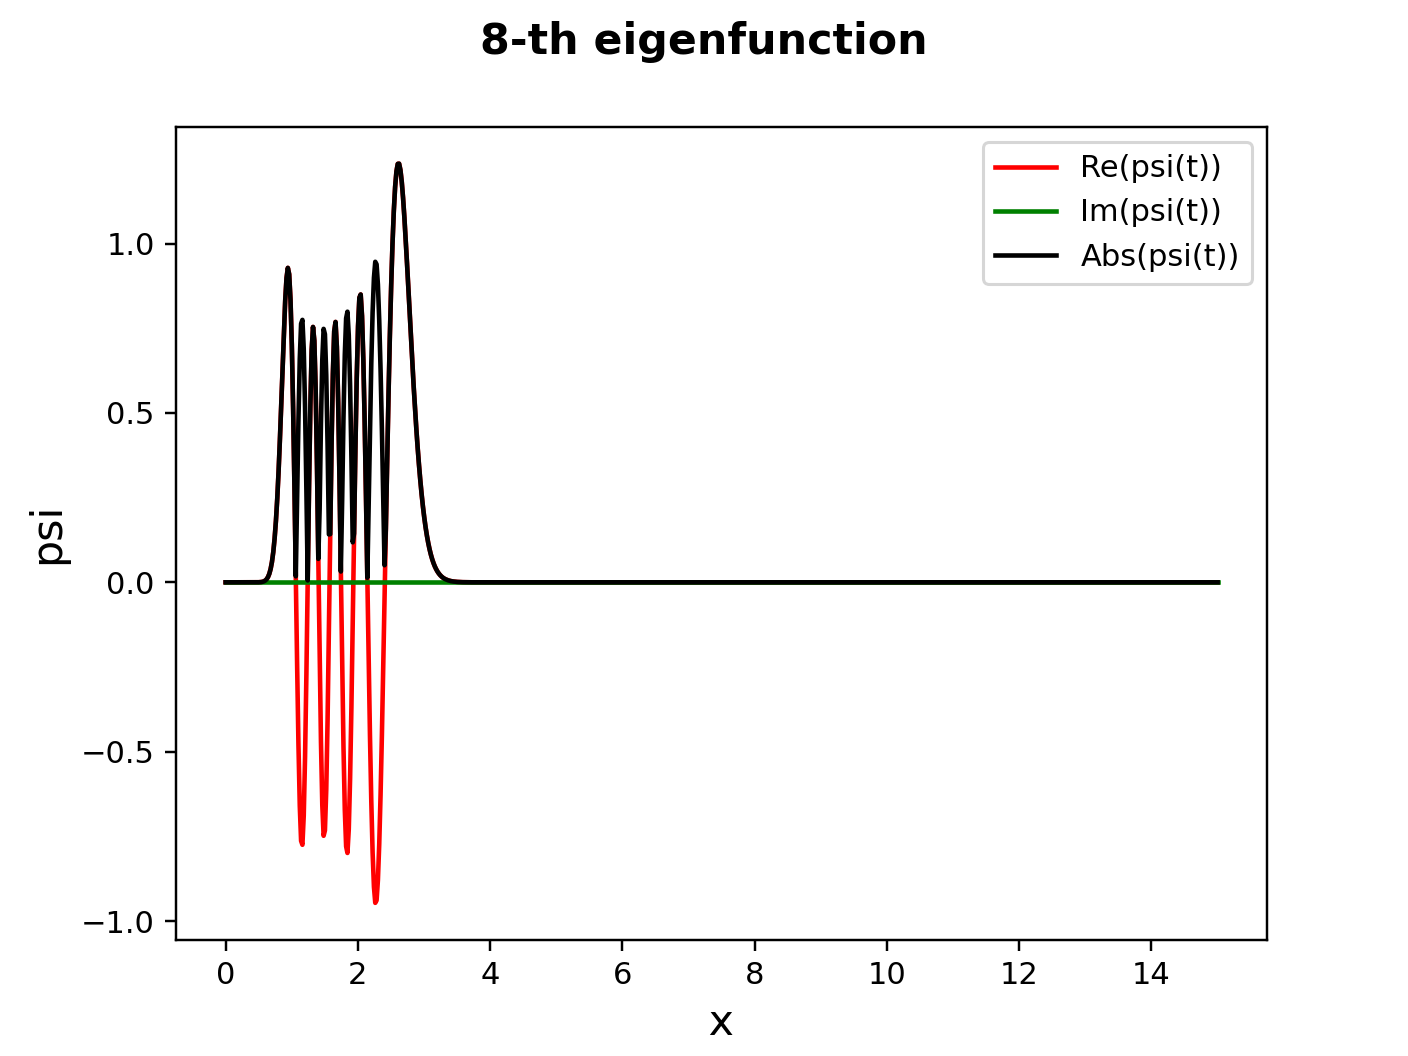


 Running from terminal, close figure window to proceed and make .pdf file of figure


In [9]:
# %%
"""                  Chem 210A/B  G. Barbalinardo and C.W. McCurdy
 Finite Element Method - Discrete Variable Representation (FEM-DVR)
 for 1D Schroedinger equation using Gauss-Lobatto quadrature in each finite element
 Uses class DVRHelper() to construct FEM-DVR points, weights and Kinetic Energy

 Example:  Harmonic Oscillator eigenfunctions and time propagation
"""
%matplotlib notebook
import time as timeclock
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
from DVR.DVRHelper import DVRHelper


# ======= PART 1: DVR Initialization =======

# Set up the potential energy for the system, all units are atomic units

a = 1.0277
re = 1.4022
De = 0.1746

def Morse (r,time):
    pot = De * (np.exp(-2*a*(r-re)) - 2*np.exp(-1*a*(r-re)) )
    return pot

mass = 1835.2395

#  Set up the FEM DVR grid given only the Finite Element boundaries and order
#  of Gauss Lobatto quadrature,  and compute the Kinetic Energy matrix for
#  this FEM DVR for Mass = mass set in call (atomic units).
time = 0
n_order = 25

# You can also create 10 equally spaced boundaries usign FEM_boundaries = np.linspace(-15, 15, 10)
#FEM_boundaries = [-15.0, -12.0, -10.0, -7.0, -2.0, 0.0, 2.0, 7.0, 10.0, 12.0, 15.0]
FEM_boundaries = np.linspace(0,15,20)
dvr = DVRHelper(n_order=n_order,
                FEM_boundaries=FEM_boundaries,
                Mass=mass)
print("DVR base", dvr.nbas)

#  Plot potential at the DVR grid points on which the wavefunction is defined
print('\nPlot potential ')
x_Plot = dvr.x_pts[1:-1]
pot_Plot = Morse(dvr.x_pts[1:-1],time)
plt.suptitle('V(x) at DVR basis function nodes', fontsize=14, fontweight='bold')
plt.plot(x_Plot, pot_Plot, 'ro', label='V')
plt.plot(x_Plot, pot_Plot, '-b')
plt.legend(loc='best')
plt.xlabel('x', fontsize=14)
plt.ylabel('V', fontsize=14)
x_min = dvr.x_pts.min()
x_max = dvr.x_pts.max()
plt.xlim([x_min, x_max])
plt.savefig('Potential.pdf', transparent=False)
plt.show()

# Build Hamiltonian at t=0
# In this problem the Hamiltonian is time-independent.
# Pass name of potential function explicitly here
# use your potential to create the Hamiltonian matrix
H_mat = dvr.Hamiltonian(V_potential=Morse,
                        time=0)
print('\nConstructed Hamiltonian at t = 0')

# Find the eigenvalues of the Hamiltonian so we can compare with known bound state energies
# or make a plot of the spectrum.  number_of_eigenvectors controls how many to compute
#      -- For a time-independent Hamiltonian in this example.
EigenVals, EigenVecs = np.linalg.eigh(H_mat)
number_of_eigenvectors = 10
print('DVR Eigenvalue, in atomic units')
for i in range(number_of_eigenvectors):
    print(' ', i, ' ', EigenVals[i])

# As an example, extract the n_Plot'th eigenfunction
# Eigenvectors are sorted so the 0-th eigenvector is the ground state
n_Plot = 8
wfcnPlot = []
for j in range(0, dvr.nbas):
    wfcnPlot.append(EigenVecs[j, n_Plot])

# normalize  a wave packet or wave function known at the FEM-DVR grid points
norm_squared = 0.
for j in range(0, dvr.nbas):
    norm_squared = norm_squared + np.abs(wfcnPlot[j]) ** 2
wfcnPlot = wfcnPlot / np.sqrt(norm_squared)
print('Norm of wave function ', n_Plot, '   being plotted is ', np.sqrt(norm_squared))

# plot a wave function using the DVRHelper class we defined with this FEM-DVr
print('\nPlot of ', n_Plot, '-th eigenfunction')
x_Plot_array, Psi_plot_array = dvr.Plot_Psi(Psi_coefficients=wfcnPlot,
                                            plot_title_string=str(n_Plot) + '-th eigenfunction',
                                            N_plot_points=750,
                                            make_plot=True)


Plot initial wave function
Norm calculated from FEM-DVR representation =  (1.0000000000000002+0j)


<IPython.core.display.Javascript object>


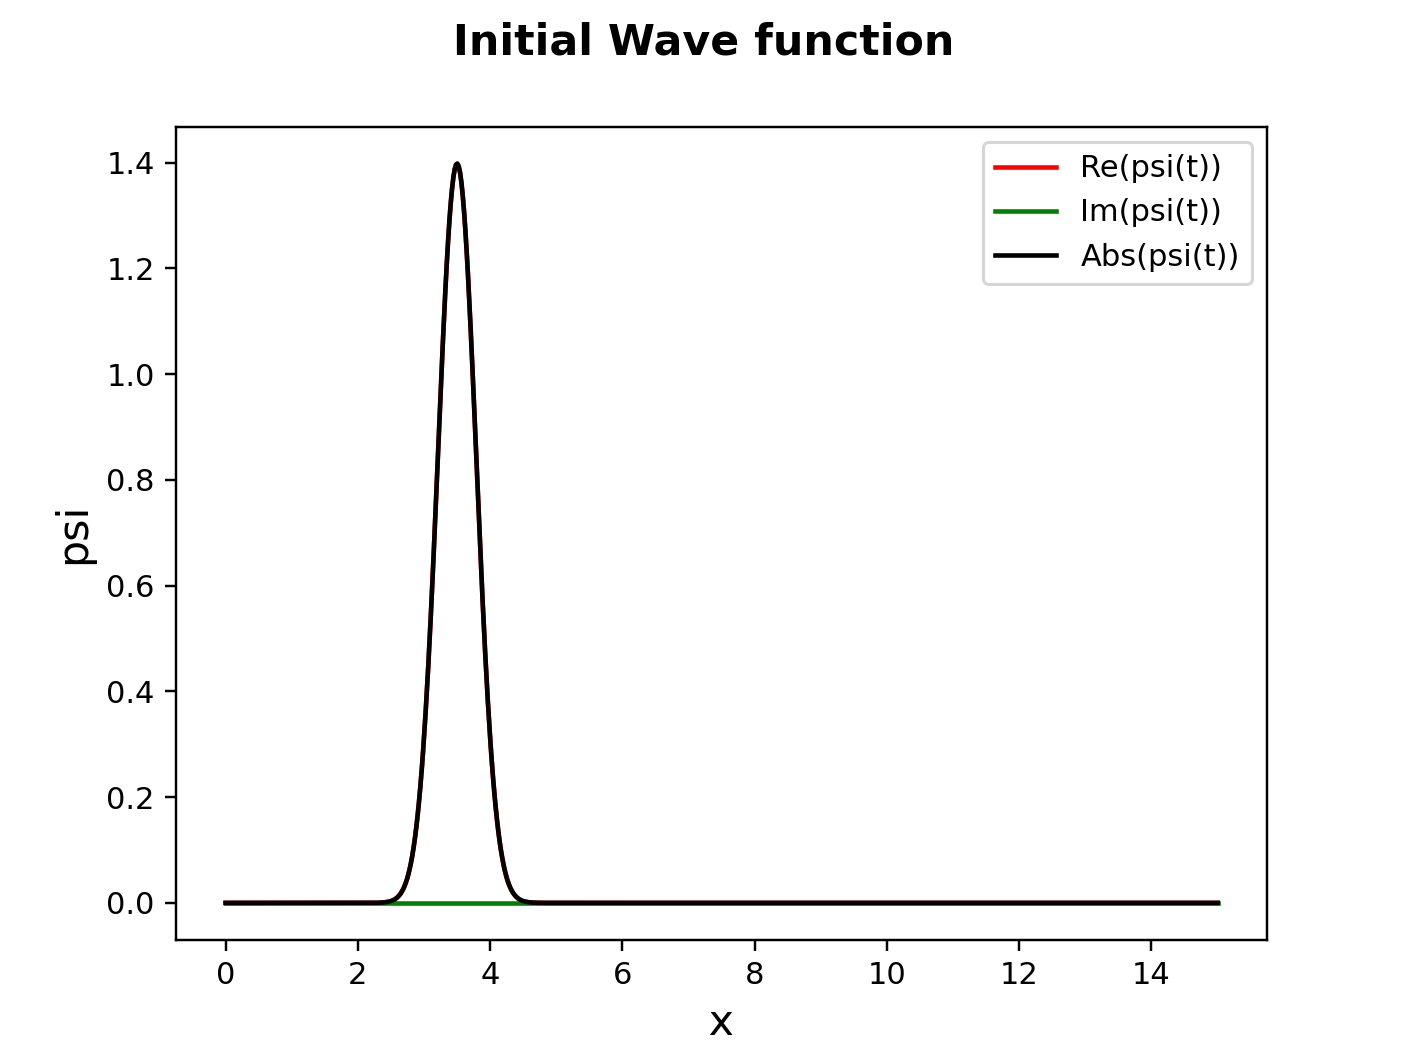


 Running from terminal, close figure window to proceed and make .pdf file of figure
Norm of starting  wave function 1.0000000000000002
Start Crank Nicolson propagation from  0.0  to  615.8826604026382  atu
                              in steps of  0.03000061670820002  with  20529  steps
End Crank-Nicolson propagation at time =  615.8826604026382
Time for  20529  Crank-Nicolson steps was  2.7874197959899902  secs.
Norm of starting  wave function 0.9999999999991952

Plot function propagated to t =  615.8826604026382  atomic time units
Norm of starting  wave function 0.9999999999991952
Start Crank Nicolson propagation from  615.8826604026382  to  1231.7653208052764  atu
                              in steps of  0.03000061670820002  with  20529  steps
End Crank-Nicolson propagation at time =  1231.7653208052764
Time for  20529  Crank-Nicolson steps was  2.821666717529297  secs.
Norm of starting  wave function 0.9999999999979088

Plot function propagated to t =  1231.7653208052764  atomi

<IPython.core.display.Javascript object>


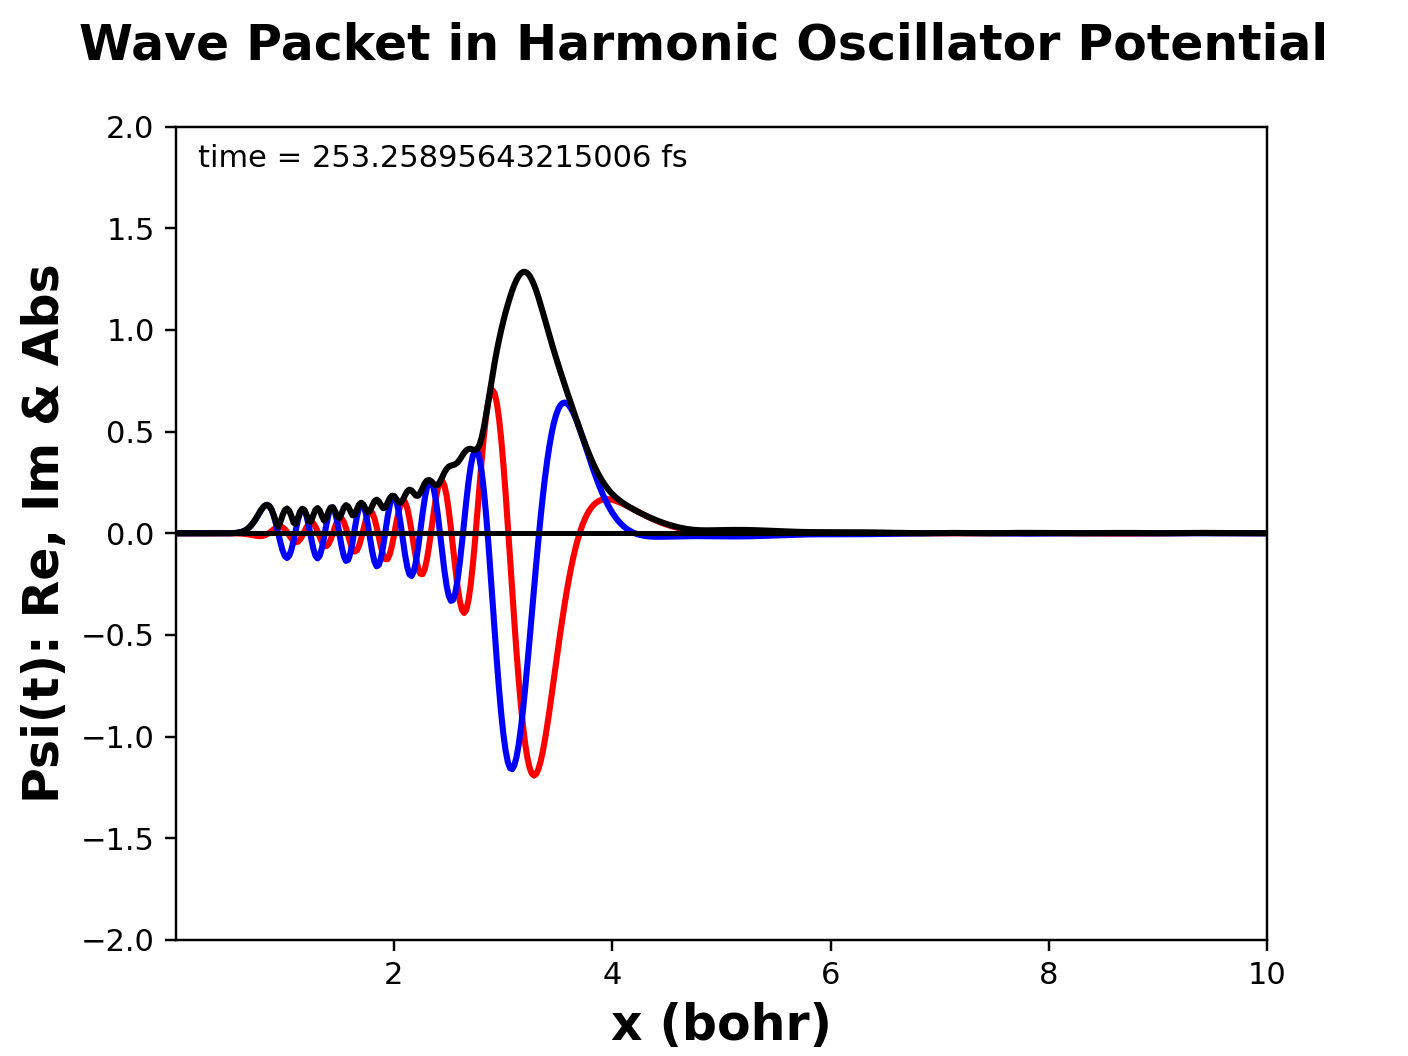

Animation saved.
done


In [10]:
# ======= PART 2: Time propagation =======

# Define an initial packet for propagation
def Gaussian_packet(x):
    alpha = 6.0
    x_0 = 3.5
    packet = np.sqrt(np.sqrt(2. * alpha / np.pi)) * np.exp(-alpha * (x - x_0) ** 2)
    return packet


# Represent a  wave packet on the FEM-DVR grid. The representation is placed in
# the vector Cinitial.  Note the wavefunction is a complex object
Cinitial = np.zeros((dvr.nbas), dtype=complex)
wfcnInitialPlot = np.zeros((dvr.nbas), dtype=complex)
for j in range(0, dvr.nbas):
    xval = dvr.x_pts[j + 1]
    if (FEM_boundaries[0] < xval < FEM_boundaries[len(FEM_boundaries) - 1]):
        Cinitial[j] = Gaussian_packet(xval) * np.sqrt(dvr.w_pts[j + 1])

# plot a wave function using the DVRHelper class we defined with this FEM-DVr
print('\nPlot initial wave function')
print("Norm calculated from FEM-DVR representation = ", np.dot(Cinitial, Cinitial))
x_Plot_array, wfcn_array = dvr.Plot_Psi(Psi_coefficients=Cinitial,
                                        plot_title_string='Initial Wave function',
                                        N_plot_points=750,
                                        make_plot=True)

# Loop over n_intervals intervals that make up t = 0 to tfinal

u = 1835.2395
Trev = (np.pi*4*u)/(a*a)


tinitial = 0.0
tfinal = Trev*1.1
n_intervals = 40
t_interval = (tfinal - tinitial) / (n_intervals-1)
times_array = np.linspace(tinitial, tfinal, n_intervals)


# Define the timestep in atomic time units
# change from 0.001 to 10
time_step = 0.03

# create an empty wavefunction array, same size as the time one,
# We'll store the wavefunction frames here
Psi_plot_time_array = np.zeros((n_intervals, len(wfcn_array)), dtype=complex)
Psi_plot_time_array[0] = wfcn_array

for i_time_interval in range(n_intervals - 1):
    t_start = times_array[i_time_interval]
    t_finish = times_array[i_time_interval + 1]

    # Check norm of initial wavefunction
    print("Norm of starting  wave function", np.sum(np.abs(Cinitial) ** 2))

    # Let's time next step for benchmarking it
    clock_start = timeclock.time()

    # Define time intervald for Crank-Nicolson propagator, then run it
    N_time_steps = int(t_interval / time_step)
    Delta_t = t_interval / float(N_time_steps)
    Ctfinal = dvr.Crank_Nicolson(t_initial=t_start,
                                 t_final=t_finish,
                                 N_times=N_time_steps,
                                 Coefs_at_t_initial=Cinitial,
                                 potential=Morse,
                                 Is_H_time_dependent=False)

    # Stop the timer for benchmarking and print the time passed.
    clock_finish = timeclock.time()
    print("Time for ", N_time_steps, " Crank-Nicolson steps was ", clock_finish - clock_start, " secs.")

    # Check norms of initial and final wavefunctions
    print("Norm of starting  wave function", np.sum(np.abs(Ctfinal) ** 2))

    # Plot of packet at end of each interval using Plot_Psi from DVR()
    print("\nPlot function propagated to t = ", t_finish, " atomic time units")
    x_Plot_array, wfcn_array = dvr.Plot_Psi(Psi_coefficients=Ctfinal,
                                            plot_title_string='Wavefunction at t = ' + str(t_finish),
                                            N_plot_points = 750,
                                            make_plot = False)
    
    # store the wavefunction, we'll need to plot it
    Psi_plot_time_array[i_time_interval + 1] = wfcn_array
    Cinitial[:] = Ctfinal[:]

# Let's add the last wavefunction

# ======= PART 3: Build the animation =======

# Now plot the animation
# reinitialize the figure for the next plot which is the animation
fig = plt.figure()

# Playing with next few lines you can adjust the x and y limits in the animation plot
ymax = 2.0
xmin = x_Plot[0]
xmax = 10.
ax = fig.add_subplot(111, autoscale_on=False, xlim=(xmin,xmax), ylim=(-ymax, +ymax))
line, = ax.plot([], [], '-r', lw=2)
line1, = ax.plot([], [], '-r', lw=2)
line2, = ax.plot([], [], '-b', lw=2)
line3, = ax.plot([], [], 'k', lw=2)

# define the object that will be the time printed on each frame
time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)


def init():
    # Init the animation object providing the structure for plotting
    line.set_data([], [])
    time_text.set_text('')
    ax.set_xlabel(" x (bohr) ", fontsize=16, fontweight='bold')
    ax.set_ylabel(" Psi(t): Re, Im & Abs ", fontsize=16, fontweight='bold')
    fig.suptitle('Wave Packet in Harmonic Oscillator Potential', fontsize=16, fontweight='bold')
    ax.plot([x_Plot[0], x_Plot[len(x_Plot) - 1]], [0, 0], 'k')  # put in a line at the value Phi = 0
    return line, time_text


def animate(i):
    #  commands to specify changing elements of the animation
    #  We precomputed all the lines at all the times so that this
    #  wouldn't recompute everything at each frame, which is very slow...
    re_array = np.real(Psi_plot_time_array[i])
    im_array = np.imag(Psi_plot_time_array[i])
    abs_array = np.abs(Psi_plot_time_array[i])
    line1.set_data(x_Plot_array, re_array)
    line2.set_data(x_Plot_array, im_array)
    line3.set_data(x_Plot_array, abs_array)
    
    # Convert time from atomic units to femtoseconds
    time_string = str(times_array[i] * 24.189 / 1000.0)
    time_text.set_text('time = ' + time_string + ' fs')
    return (line1, line2, line3, time_text)

# Call the animator.  blit=True means only re-draw the parts that have changed.
anim = FuncAnimation(fig, animate,
                     init_func=init,
                     frames=n_intervals,
                     interval=200,
                     blit=True,
                     repeat=True)

# Finally, save the anmation
# You may need the ffmpeg to save the animation. If you get an error in the next step, try:
# conda install -c conda-forge ffmpeg
anim.save('Time propagation of the wavefunction_pset7.mp4')
print('Animation saved.')

# Show the animation
plt.show()
print('done')